# Signal Processing Notebook: 02 
### Non- staionary signal with additive interaction between modes
### Non-linear signal with multiplicative interaction between modes (inter-mode non-linearity)
### Non-linear and non-stationary signal with multiplicative interaction between modes

This Notebook explains the Spectral Analysis of artificial signal using Fourier spectrum, Spectrogram, Pwelch metchod and Hilbert Huang Transform. Artificial signals are composed of two sinusoids and an exponential decay with additive and multiplicative interactions between modes. 

$$ x_0 =  2.0 \times\sin({5 \cdot 2\pi t}) + 1.0 \times \sin({3 \cdot 2\pi t}) + Noise $$


$$ x_1 =  2.0 \times e^{-0.05 t} \times\sin({5 \cdot 2\pi t}) + 1.0 \times \sin({3 \cdot 2\pi t}) + Noise $$

$$ x_2 = 2.0 \times \sin({5 \cdot 2\pi t}) \times \sin({3 \cdot 2\pi t}) + Noise $$

$$ x_3 = 2.0  \times e^{-0.05 t} \times \sin({5 \cdot 2\pi t}) \times \sin({3 \cdot 2\pi t}) + Noise $$

- First signal is stationary and linear
- Second signal is non-stationary but linear.
- Third signal is non-linear but stationary (intermode non-linearity).
- Fourth signal is non-linear and non stationary


#### Contents of Notebook

1. Importing necessary libraries for signal processing, computing, plotting images
2. Signal Construction
3. Fourier Spectrum
4. Spectrogram
5. Pwelch Method
6. Hilbert huang Transform


#### Sources to learn Python, Numpy, SciPy, Pandas, Matplotlib:

* [Automate the Boring Stuff](https://automatetheboringstuff.com/)
* [Dive into Python3](https://diveintopython3.net/)
* [Python for Everyone](https://www.py4e.com/)
* [Numpy User guide](https://numpy.org/doc/stable/numpy-user.pdf)
* [Pandas User guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Pandas dataframe](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)
* [Scipy Lecture Notes](http://scipy-lectures.org/index.html)
* [Scipy Signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html)
* [Matplotlib](http://scipy-lectures.org/intro/matplotlib/index.html)
* [Seaborn](https://seaborn.pydata.org/)
* [EMD](https://emd.readthedocs.io/en/stable/emd_tutorials/index.html)

Feel free to write me feedback at vishusharma296@gmail.com


**Author: Vishu Sharma** 

-Last Update: 01.09.2023\
-First Version: 26.03.2022\
-Version: 03_2022


In [1]:
# Importing Libraries

%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import seaborn as sns


from scipy.fft import fft, ifft, rfft, rfftfreq
from scipy import signal
from scipy import ndimage

import emd

In [2]:
# Figure settings

sns.set(style="whitegrid")

rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
# Signal Properties

fs = 20                             # Sampling frequency
N = 2048                            # Number of data points
T = 1/fs                            # Sampling period
t = np.arange(N) / float(fs)        # Time vector

r=2*np.pi                           # For converting frequency in Hz to angular frequency in radians

In [4]:
# Checking dimensions of time vector and its values

print(t)
np.shape(t)

[0.0000e+00 5.0000e-02 1.0000e-01 ... 1.0225e+02 1.0230e+02 1.0235e+02]


(2048,)

#### Signal construction

In [10]:
# Signal components

A = 2.0*np.sin(5*r*t);                # First sinusoid
B = 1.0*np.sin(3*r*t);                # Second sinusoid
E = np.exp(-0.05*t);                 # Exponential Decay

noise_power = 0.001 * fs / 2          # Noise power
rng = np.random.default_rng()         # random number generator
Noise = rng.normal(scale=np.sqrt(noise_power), size=t.shape);


###  Linear Stationary signal with (additive interaction between modes)

$$ x_0 =  2.0 \times\sin({5 \cdot 2\pi t}) + 1.0 \times \sin({3 \cdot 2\pi t}) + Noise $$


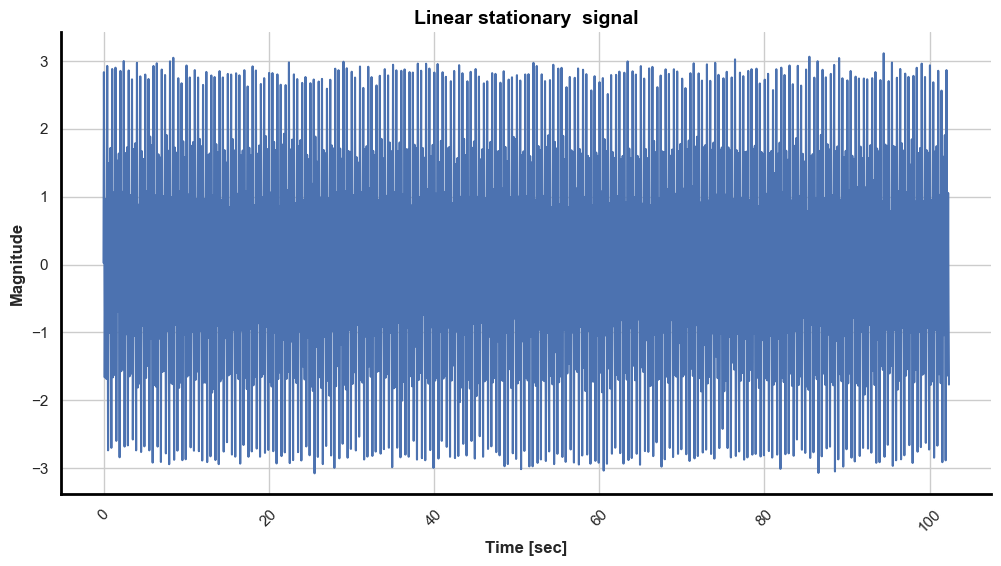

In [24]:
x0 = A + B + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x0, 'b')
plt.title('Linear stationary  signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_00_TD_x0_NS-L.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

### Non-stationary linear signal with (additive interaction between modes)

$$ x_1 =  2.0 \times e^{-0.05 t} \times\sin({5 \cdot 2\pi t}) + 1.0 \times \sin({3 \cdot 2\pi t}) + Noise $$

Note here only one component of signal is non-stationary due to the exponential decay. Overall signal is still linear due to additive interaction between modes.

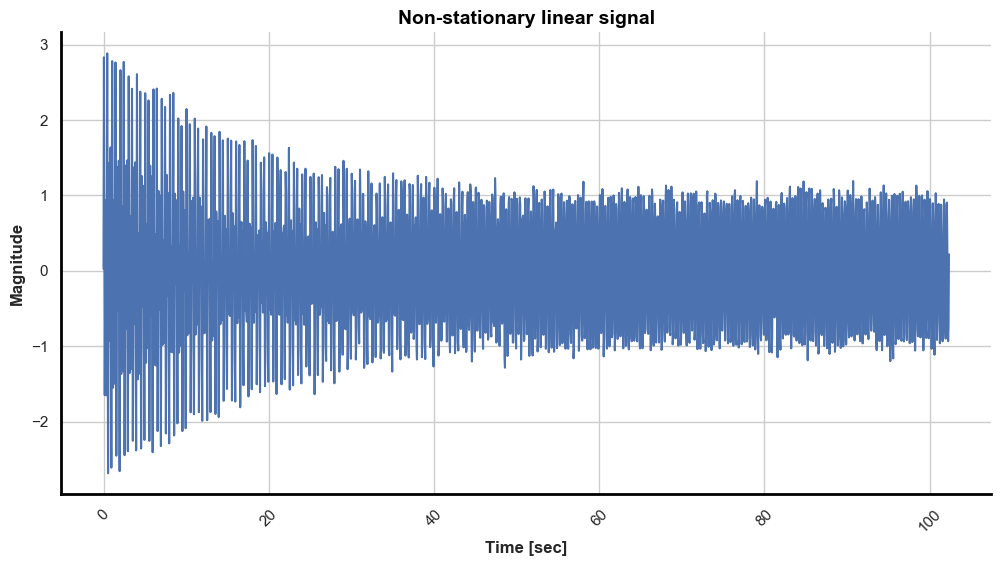

In [11]:
x1 = A*E + B + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x1, 'b')
plt.title('Non-stationary linear signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_01_TD_x1_NS-L.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


### Non-linear stationary signal with (with multiplicative interaction between modes)

$$ x_2 = 2.0 \times \sin({5 \cdot 2\pi t}) \times \sin({3 \cdot 2\pi t}) + Noise $$

In this signal the non-linearity arises due to multiplicative interaction between modes. This type of non-linearity is called inter-mode non-linearity because it arises from the non-linear interaction between differnt modes. Not that this signal is still stationary.

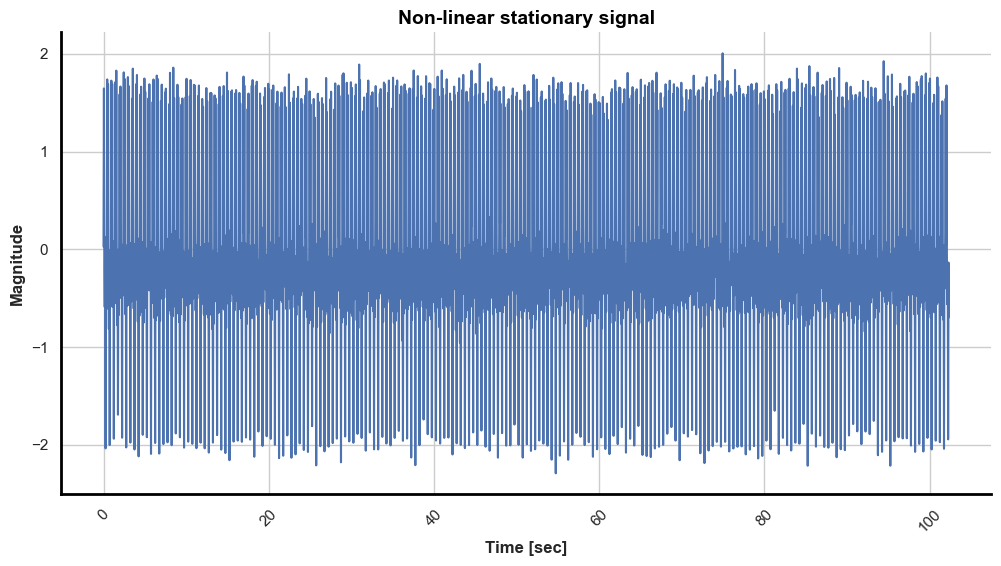

In [12]:
x2 = A*B + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x2, 'b')
plt.title('Non-linear stationary signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_02_TD_x2_NL-S.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


### Non-linear non-stationary signal

$$ x_3 = 2.0  \times e^{-0.05 t} \times \sin({5 \cdot 2\pi t}) \times \sin({3 \cdot 2\pi t}) + Noise $$

This signal is non-linear as well as non-stationary.

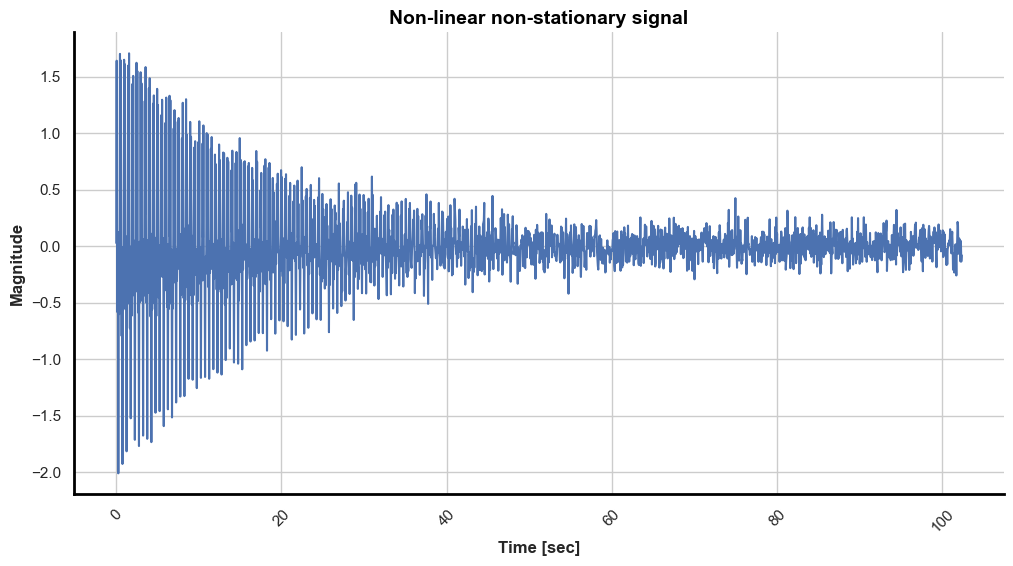

In [14]:
x3 = A*B*E + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x3, 'b')
plt.title('Non-linear non-stationary signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

#plt.subplot(211)
#plt.plot(Noise)

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_03_TD_x3_NL-NS.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Frequency spectrum of Non-stationary linear signal (with additive interaction between modes) using FFT 

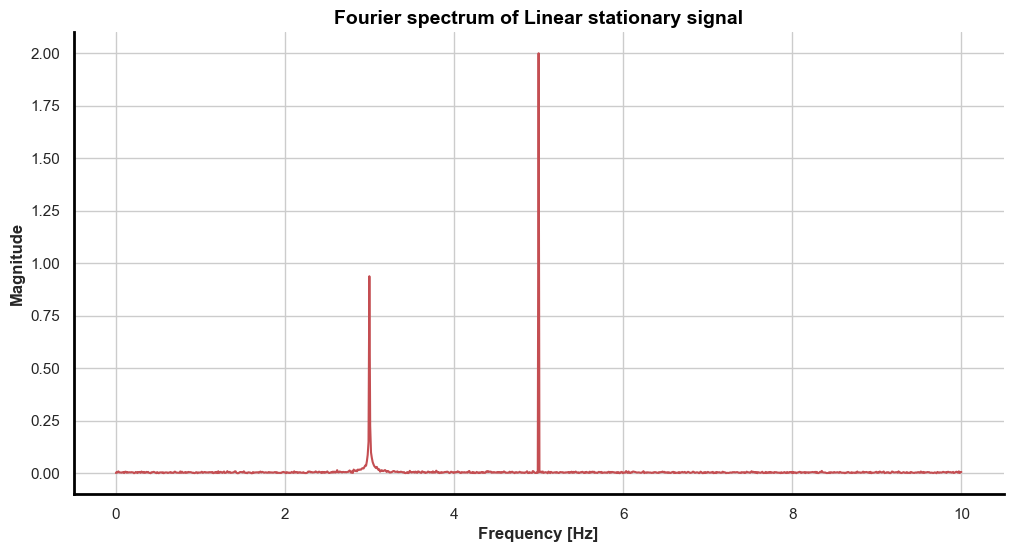

In [26]:
# Fourier Spectrum for linear stationary  signal (with additive interaction between modes)
# Fourier Spectrum of signal x0 using SciPy

FFT_x0 = rfft(x0)                                      # FFT of real input signal
Freq_x0 = rfftfreq(len(x0), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x0 =  np.abs(FFT_x0)/(0.5*len(x0))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x0, FFT_normalized_x0, 'r') 
plt.title('Fourier spectrum of Linear stationary signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("SP02_00_FD_x0_LS.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


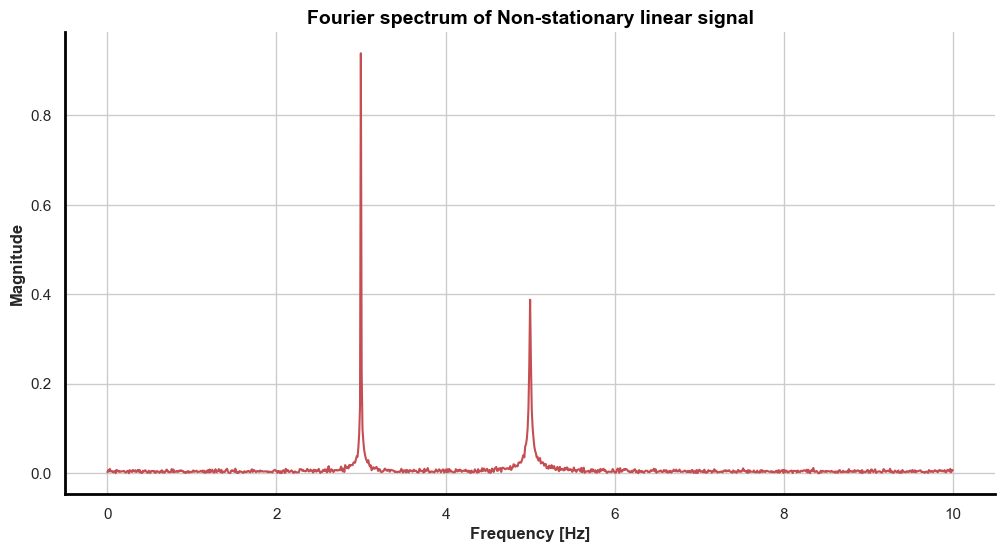

In [25]:
# Fourier Spectrum for Non-stationary linear signal (with additive interaction between modes)
# Fourier Spectrum of signal x1 using SciPy

FFT_x1 = rfft(x1)                                      # FFT of real input signal
Freq_x1 = rfftfreq(len(x1), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x1 =  np.abs(FFT_x1)/(0.5*len(x1))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x1, FFT_normalized_x1, 'r') 
plt.title('Fourier spectrum of Non-stationary linear signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("SP02_01_FD_x1_NS-L.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()



#### Frequency spectrum of Non- linear stationary signal (with multiplicative interaction between modes) using FFT 

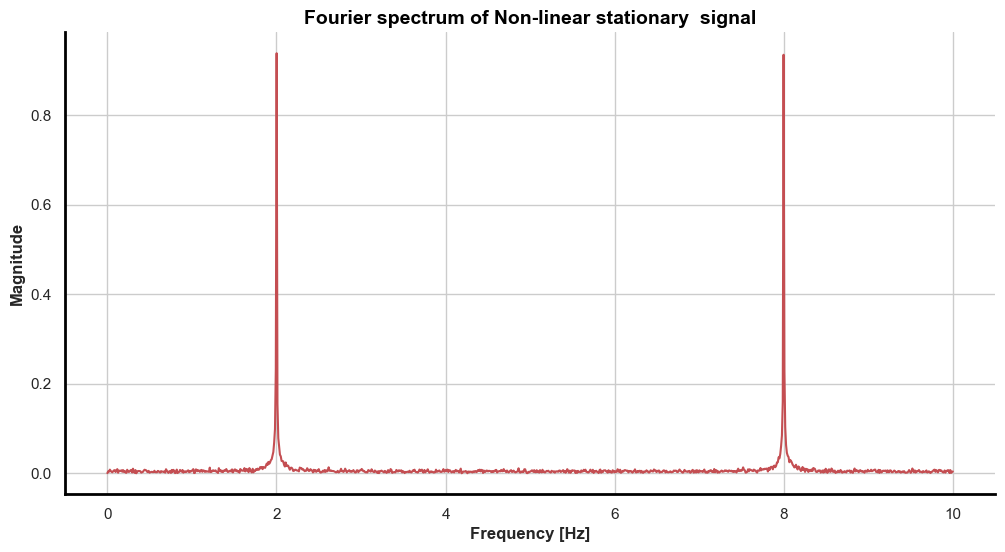

In [22]:
# Fourier Spectrum for signal with multiplicatice interaction between modes
# Fourier Spectrum of signal x2 using SciPy

FFT_x2 = rfft(x2)                                      # FFT of real input signal
Freq_x2 = rfftfreq(len(x2), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x2 =  np.abs(FFT_x2)/(0.5*len(x2))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x2, FFT_normalized_x2, 'r') 
plt.title('Fourier spectrum of Non-linear stationary  signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("SP02_02_FD_x2_NL-S.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Frequency spectrum of Non-linear non-stationary signal (with multiplicative interaction between modes) using FFT 

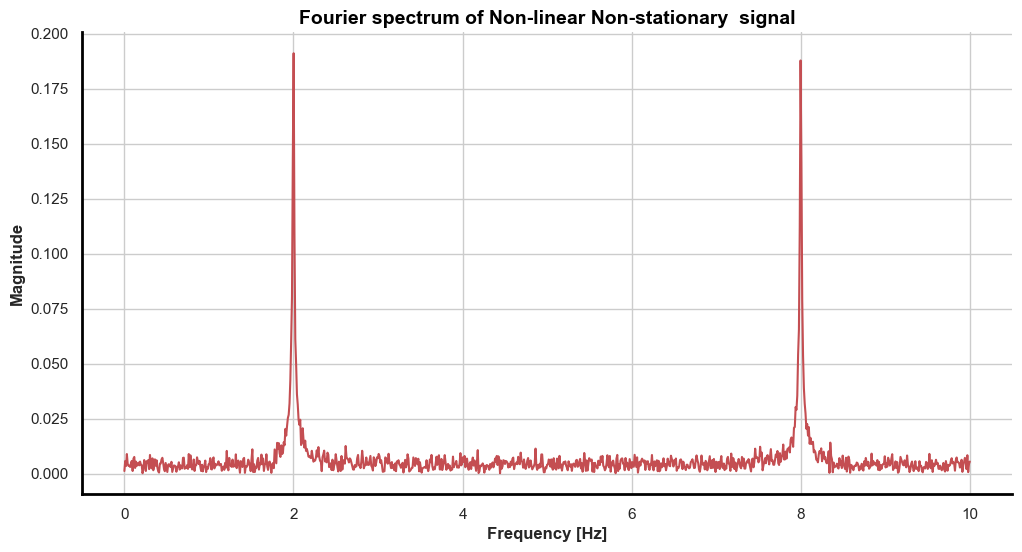

In [23]:
# Fourier Spectrum for signal with multiplicatice interaction between modes
# Fourier Spectrum of signal x1 using SciPy

FFT_x3 = rfft(x3)                                      # FFT of real input signal
Freq_x3 = rfftfreq(len(x3), T)                         # rfftfreq takes num of data points and sample spacing as input
FFT_normalized_x3 =  np.abs(FFT_x3)/(0.5*len(x3))      # Normalizing result to correct the magnitude

# Plotting

plt.plot(Freq_x3, FFT_normalized_x3, 'r') 
plt.title('Fourier spectrum of Non-linear Non-stationary  signal', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.ylabel('Magnitude', fontsize=12, fontweight='bold')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)


## Saving the image
resolution_value = 600
plt.savefig("SP02_03_FD_x3_NL-NS.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Spectrogram for Linear stationary  signal (with additive interaction between modes)

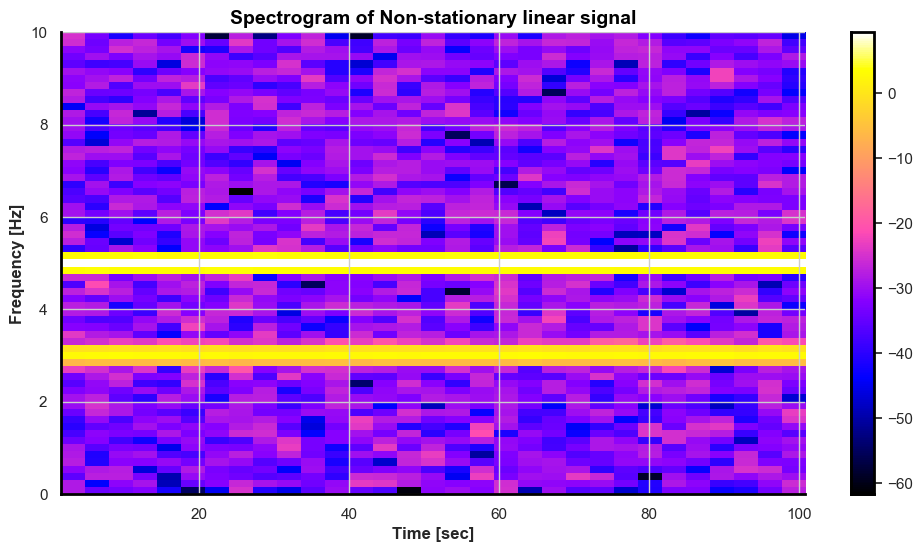

In [30]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x0, Fs = fs, NFFT = 128, noverlap = 64, cmap= 'gnuplot2')

plt.title('Spectrogram of Non-stationary linear signal', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_00_TFD_x0_LS.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()

#### Spectrogram for Non-stationary linear signal (with additive interaction between modes)

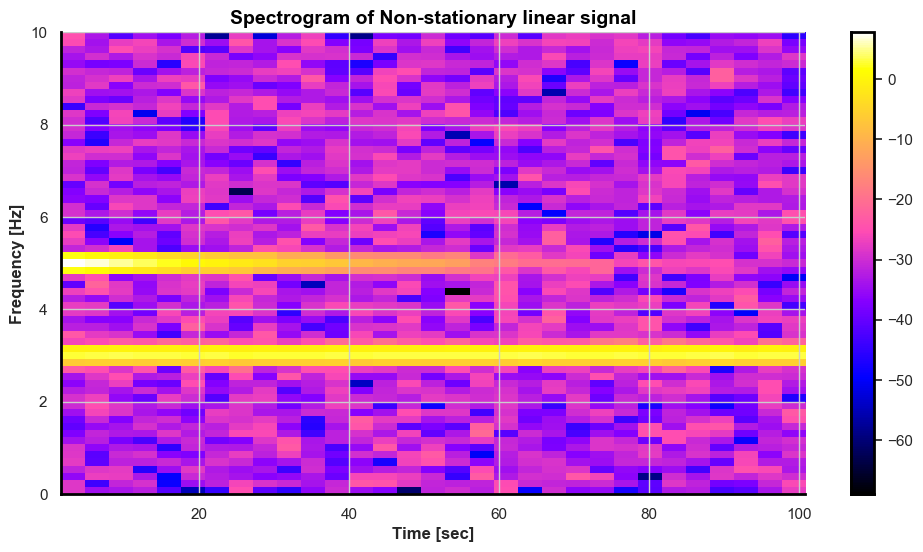

In [31]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x1, Fs = fs, NFFT = 128, noverlap = 64, cmap= 'gnuplot2')

plt.title('Spectrogram of Non-stationary linear signal', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_01_TFD_x1_NS-L.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Spectrogram for Non-linear stationary signal (with additive interaction between modes)

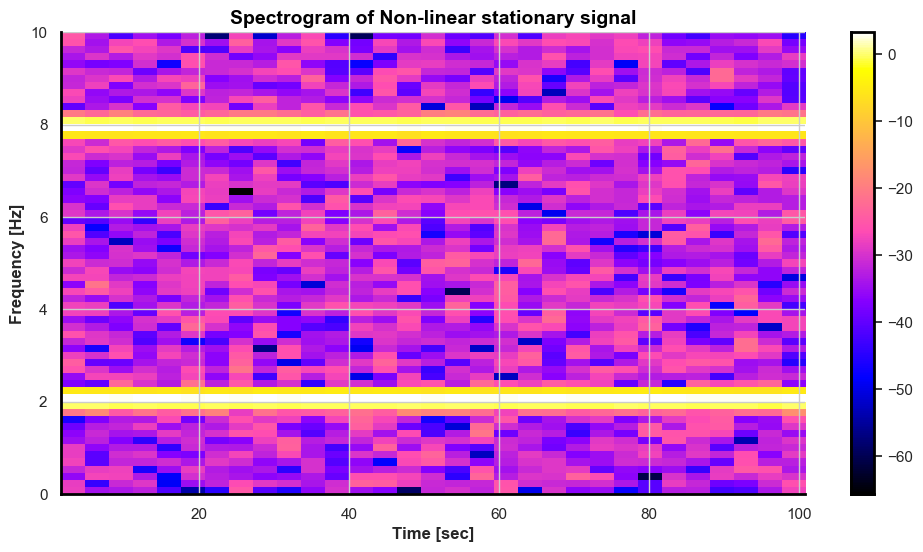

In [32]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x2, Fs = fs, NFFT = 128, noverlap = 64, cmap= 'gnuplot2')

plt.title('Spectrogram of Non-linear stationary signal', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_02_TFD_x2_NL-S.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Spectrogram for Non-linear non-stationary signal (with additive interaction between modes)

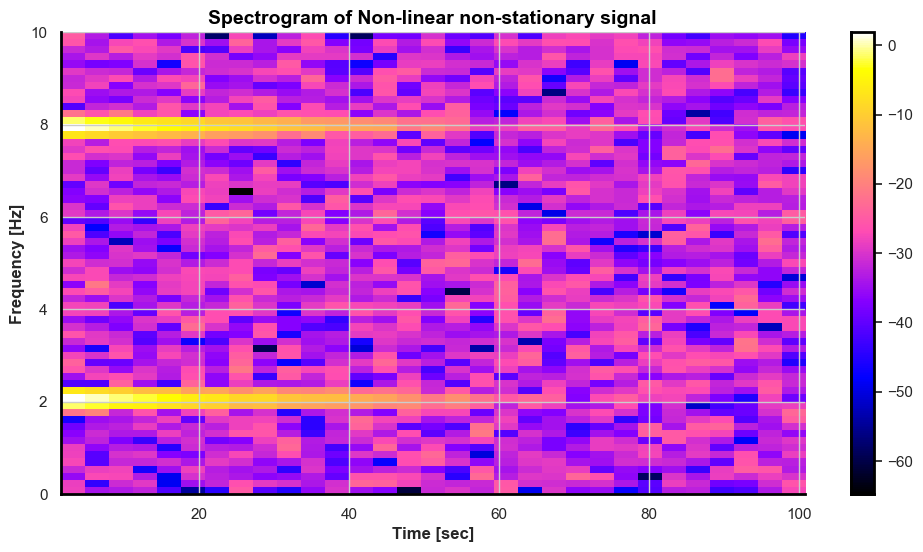

In [33]:
# Spectrogram with window for signal with additive interaction between modes
# In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x3, Fs = fs, NFFT = 128, noverlap = 64, cmap= 'gnuplot2')

plt.title('Spectrogram of Non-linear non-stationary signal', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency [Hz]', fontsize=12, fontweight='bold')
plt.xlabel('Time [sec]', fontsize=12, fontweight='bold')

plt.colorbar()
#plt.show()

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_03_TFD_x3_NL-NS.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)
plt.show()


#### Hilbert Spectral Analysis using Hilbert Huang Transform

In [34]:
# Doing Empirical mode decomposition of signal

t = np.arange(N) / float(fs)                  # Time vector

#imf = emd.sift.sift(x)

imf_x0 = emd.sift.mask_sift(x0, max_imfs=5)   # Intrinsic mode functions for x0
imf_x1 = emd.sift.mask_sift(x1, max_imfs=5)   # Intrinsic mode functions for x1
imf_x2 = emd.sift.mask_sift(x2, max_imfs=5)   # Intrinsic mode functions for x2
imf_x3 = emd.sift.mask_sift(x3, max_imfs=5)   # Intrinsic mode functions for x3


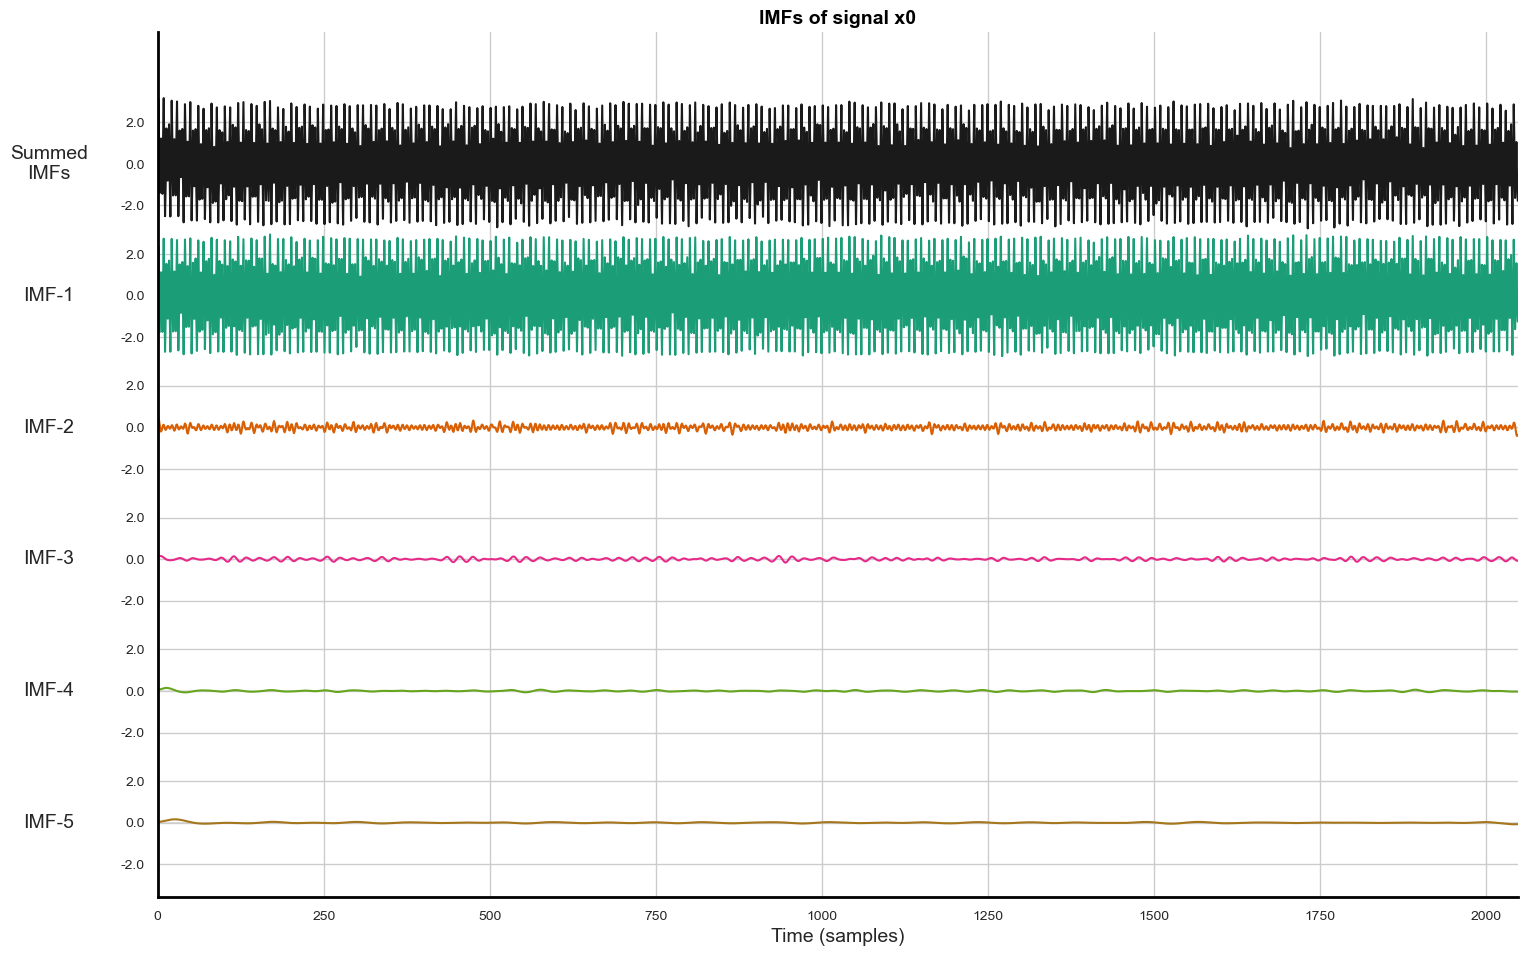

In [35]:
#Visualising Resulting IMFs

emd.plotting.plot_imfs(imf_x0)
plt.title('IMFs of signal x0', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_IMFs_x0.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)



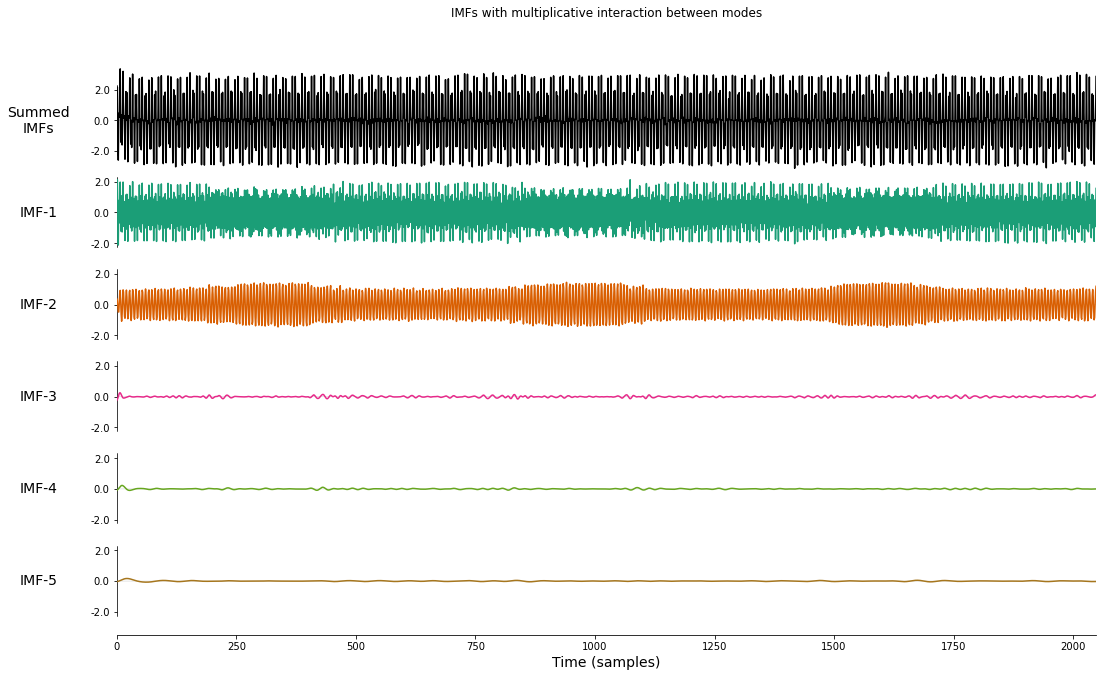

In [16]:
#Visualising Resulting IMFs

emd.plotting.plot_imfs(imf_x1)
plt.title('IMFs of signal x1', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_IMFs_x1.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)



In [ ]:
#Visualising Resulting IMFs

emd.plotting.plot_imfs(imf_x2)
plt.title('IMFs of signal x2', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_IMFs_x2.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)

In [ ]:
#Visualising Resulting IMFs

emd.plotting.plot_imfs(imf_x3)
plt.title('IMFs of signal x2', fontsize=14, fontweight='bold', color='black')

sns.despine()
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'black'
rcParams['figure.figsize'] = (12, 6)

## Saving the image
resolution_value = 600
plt.savefig("SP02_IMFs_x3.jpeg", bbox_inches = 'tight', format = "jpeg", dpi = resolution_value)

In [17]:
#Computing instantaneous phase, instantaneous frequency and amplitude.

IP_x0, IF_x0, IA_x0 = emd.spectra.frequency_transform(imf_x0, fs, 'hilbert')
IP_x1, IF_x1, IA_x1 = emd.spectra.frequency_transform(imf_x1, fs, 'hilbert')
IP_x2, IF_x2, IA_x2 = emd.spectra.frequency_transform(imf_x2, fs, 'hilbert')
IP_x3, IF_x3, IA_x3 = emd.spectra.frequency_transform(imf_x3, fs, 'hilbert')

Text(0, 0.5, 'Frequency [Hz]')

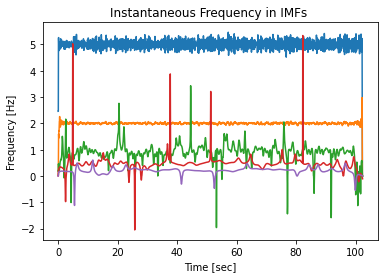

In [18]:
# Plotting instantaneous frequency for signal 1
plt.plot(t, IF_x0)
plt.title('Instantaneous Frequency in IMFs of x0 ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

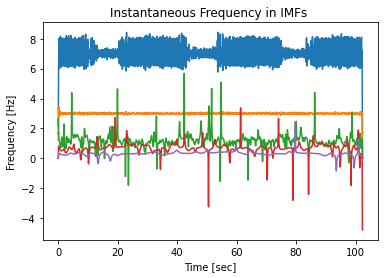

In [19]:
# Plotting instantaneous frequency for signal 2
plt.plot(t, IF_x1)
plt.title('Instantaneous Frequency in IMFs of x1')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Power')

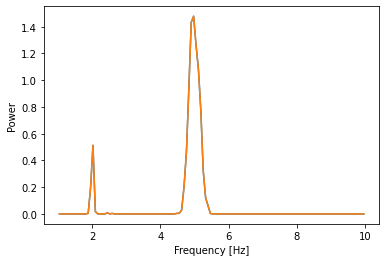

In [22]:
# Applying HHT to IMFs of x1

f_range = (1, 10, 128)
hht_x1, spec = emd.spectra.hilberthuang(IF_x0, IA_x0, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power') 


Text(0, 0.5, 'Power')

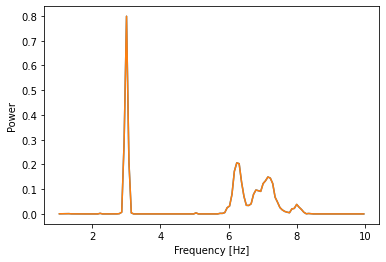

In [23]:
# Applying HHT to IMFs of x2

f_range = (1, 10, 128)
hht_x2, spec = emd.spectra.hilberthuang(IF_x2, IA_x2, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power dB/Hz') 